In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from astropy.timeseries import LombScargle
from astropy.timeseries import LombScargleMultiband

## Periodograms

In [2]:
data_global = pd.read_pickle("../../PeriodogramsGaia/dataset/data_global.pkl")

In [3]:
def folded_lc_image(lc, period, d_folder_lc):
    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)

    for name_band, data in lc.groupby("band"):
        mask = data["rejected_by_variability"]=="false"
        mjd, flux, flux_err = data.loc[mask][['time', 'flux', 'flux_error']].values.T
        phase = np.mod(mjd, period)/period
        ax.errorbar(phase, flux, flux_err, fmt='.', label=name_band)
        
    ax.set_xlabel(f'Phase @ P:{period:0.4f}')
    ax.set_ylabel('Flux')
    ax.set_title(f'Source_id: {lc["source_id"].loc[0]}')
    ax.legend()
    plt.savefig(d_folder_lc + "/folded_light_curve.png")

In [4]:
def periodograms_band(lc,period, d_folder_lc, freq):
    fig, ax = plt.subplots(3, figsize=(6,4), tight_layout=True, sharex=True, sharey=True)

    print(2/period)
    freq = np.arange(0.0028, 2*4.358991 , 0.01) # size 4990
    for (name, data), ax_ in zip(lc.groupby("band"), ax):
        band = data['band'].iloc[0]
        mask = data["rejected_by_variability"]=="false"
        time, flux, flux_err =data.loc[mask][['time', 'flux', 'flux_error']].values.T
        per = LombScargle(time, flux, flux_err).power(freq)
        ax_.axvline(1/period, ls='--', lw=2, alpha=0.5, c='g')
        ax_.axvline(2/period, ls='--', lw=2, alpha=0.5, c='r')
        ax_.plot(freq, per)
        ax_.set_title('Periodogram band' + band)
    ax_.set_xlabel('Frequency [1/days]')
    plt.savefig(d_folder_lc + "/periodograms_band.png")

In [12]:
def periodogram_multiband(lc, period, d_folder_lc, freq):
    times, fluxs, ferrs, bands = [], [], [], []
    for (name, data) in lc.groupby("band"):
        mask = data["rejected_by_variability"]=="false"
        time, flux, flux_err = data.loc[mask][['time', 'flux', 'flux_error']].values.T
        times += list(time)
        fluxs += list(flux)
        ferrs += list(flux_err)
        bands += [name]*len(flux)
    per = LombScargleMultiband(times, fluxs, bands, ferrs).power(freq)

    fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True, sharex=True, sharey=True)
    ax.plot(freq, per)
    ax.axvline(1/period, ls='--', lw=2, alpha=0.5, c='g') # True period
    ax.axvline(2/period, ls='--', lw=2, alpha=0.5, c='r') # Half the period
    ax.set_title('Multi band periodogram')
    ax.set_xlabel('Frequency [1/days]')
    plt.savefig(d_folder_lc+'/periodogram_multiband.png')

1.0673250134859051
4.911648547217341
5.331407424871453
3.492376860599353
1.2788685092942569
4.087449005137373
3.842368338096926


/tmp/ipykernel_9565/2640656565.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True, sharex=True, sharey=True)


3.98580854961749
4.0270445539867294
3.689149634929945


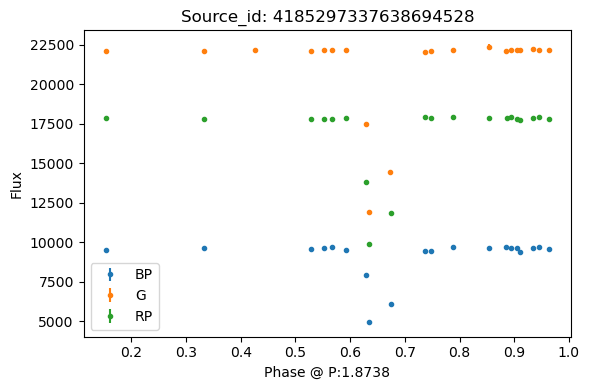

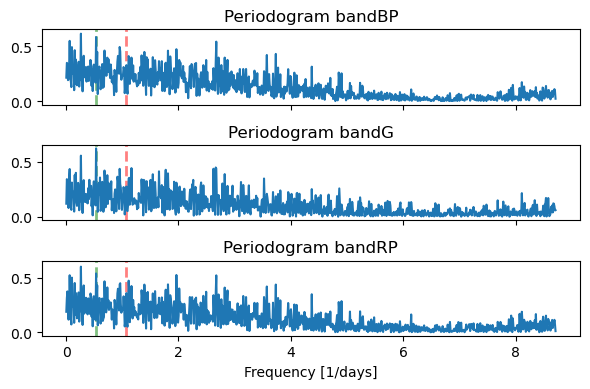

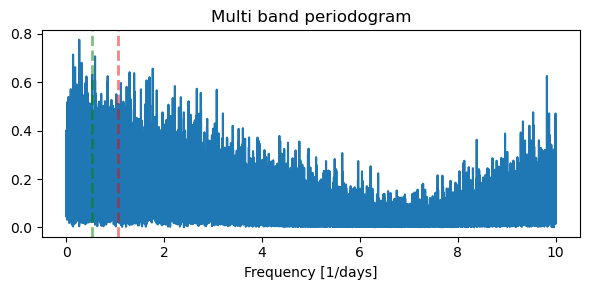

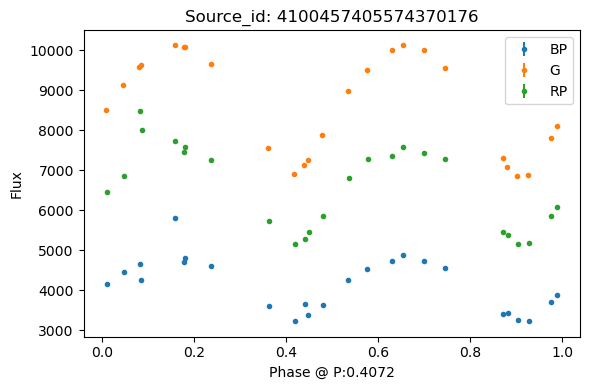

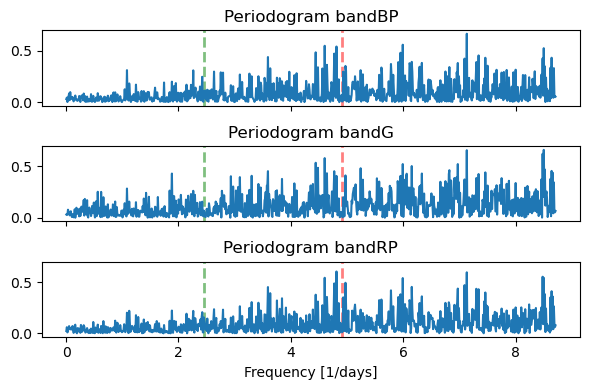

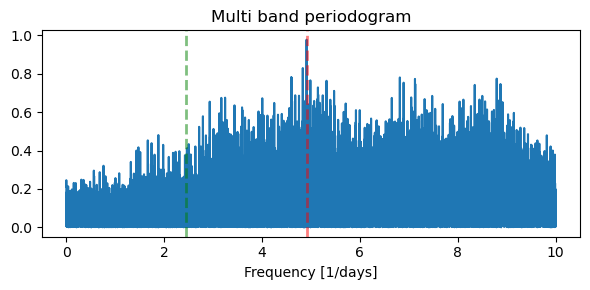

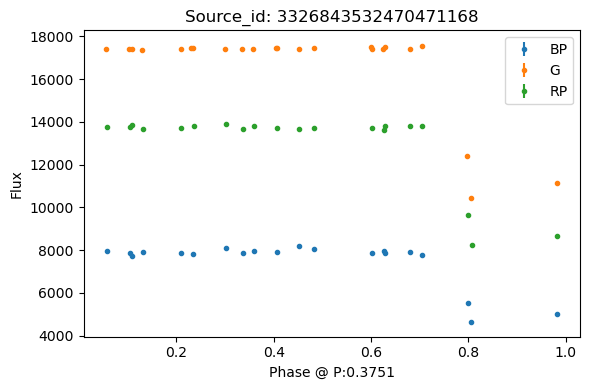

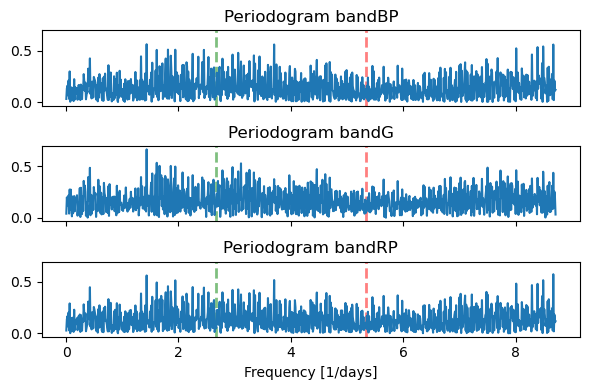

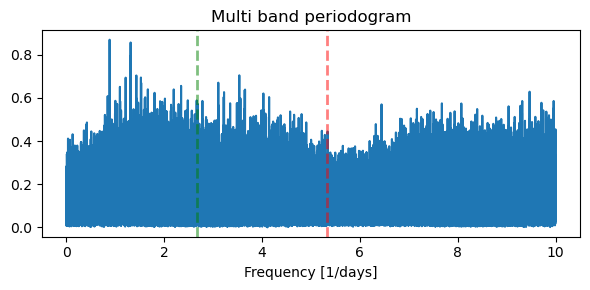

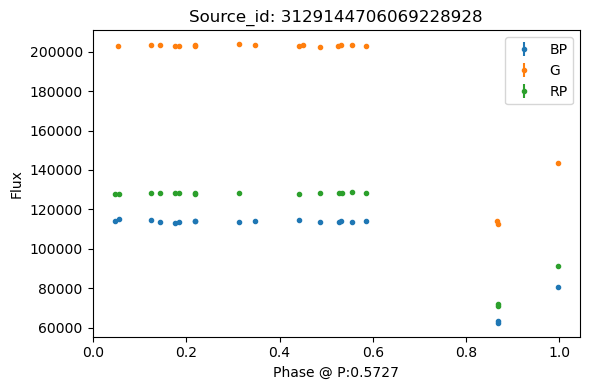

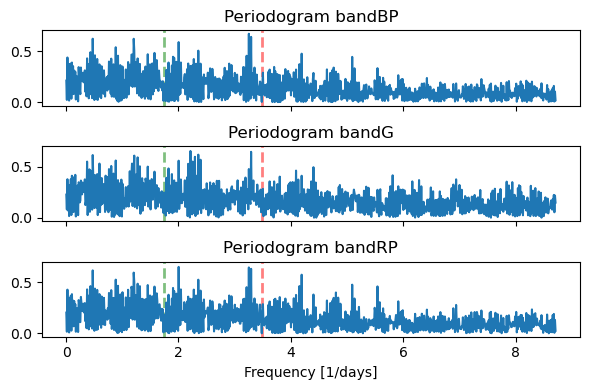

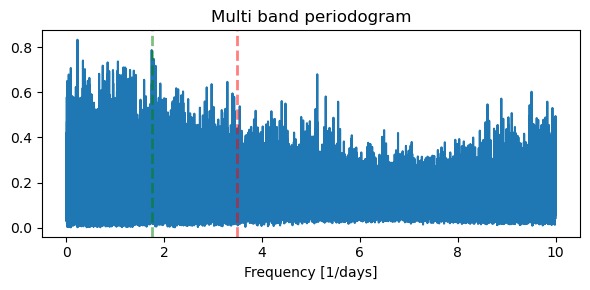

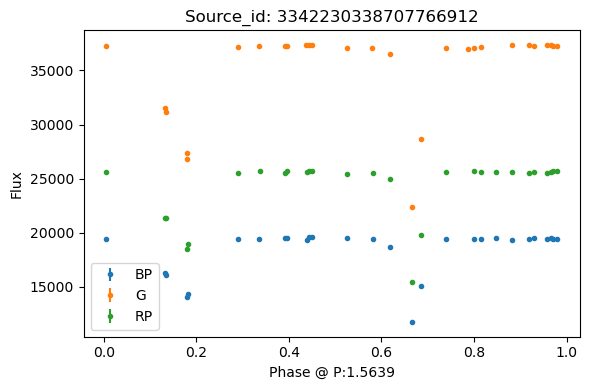

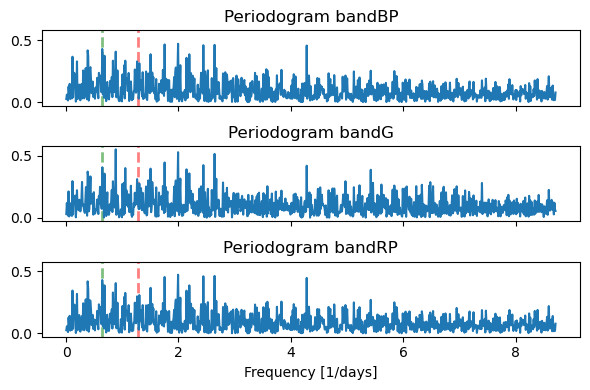

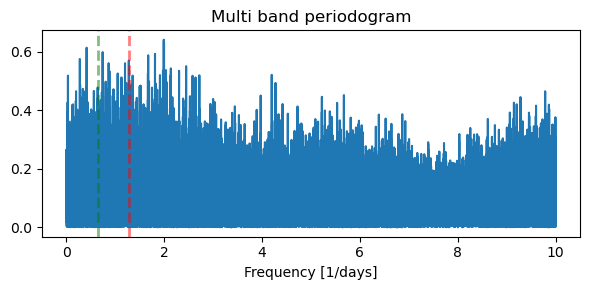

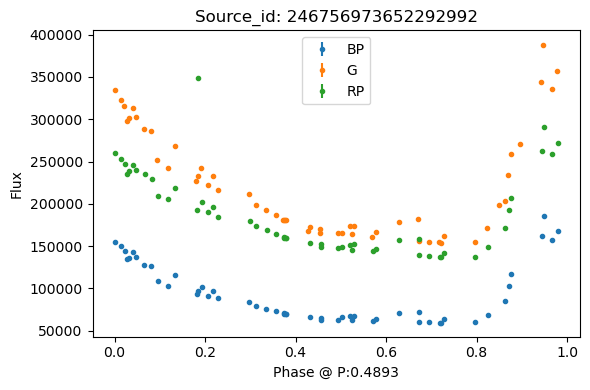

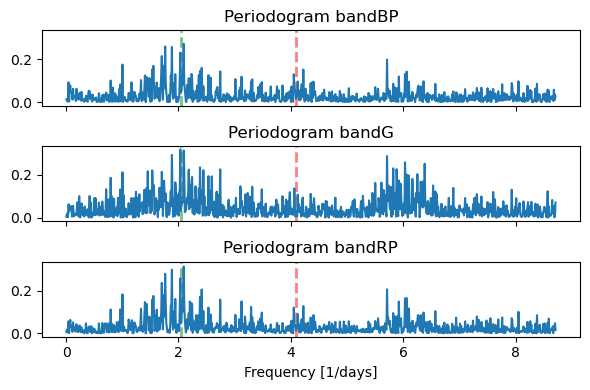

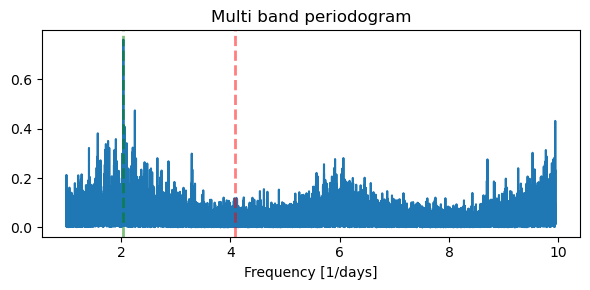

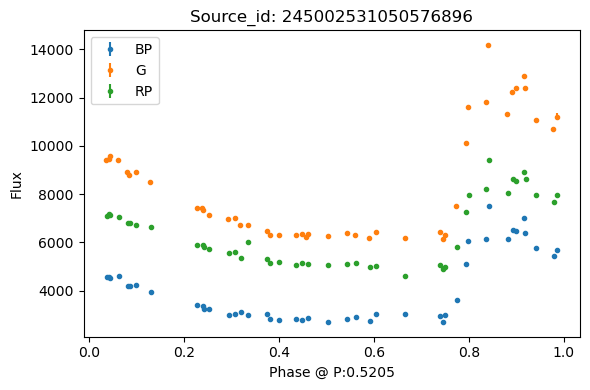

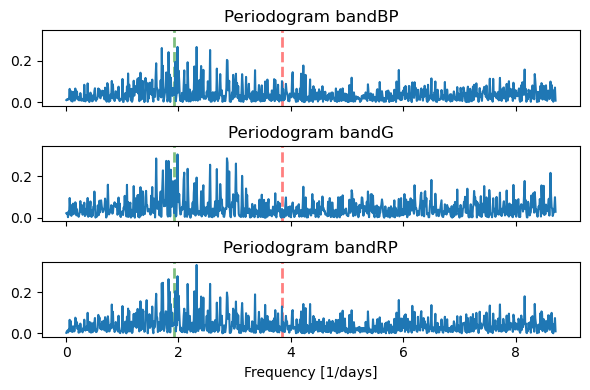

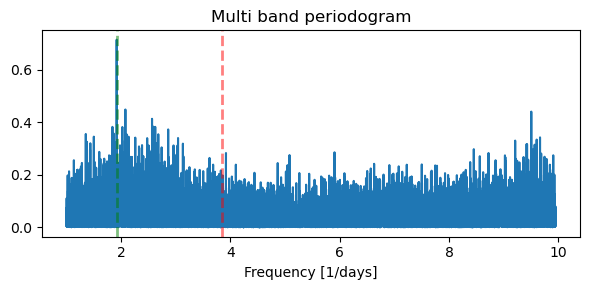

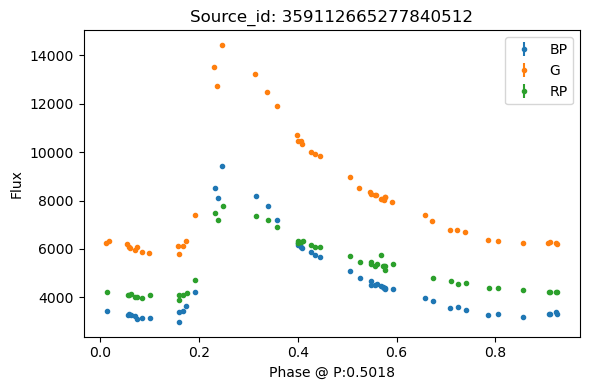

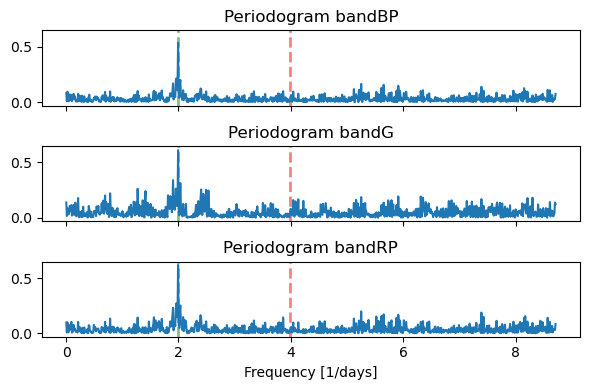

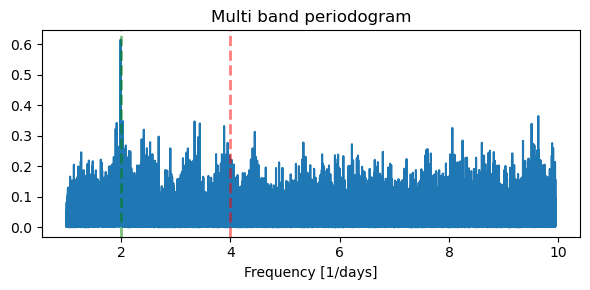

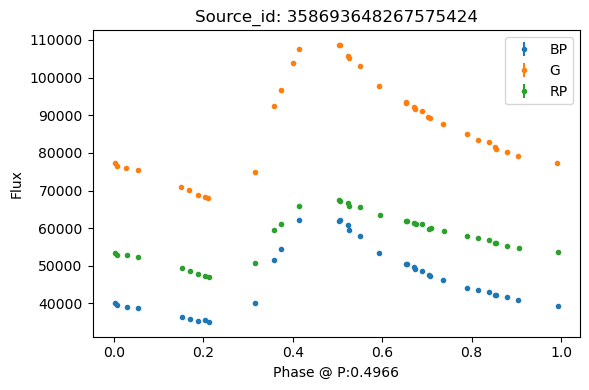

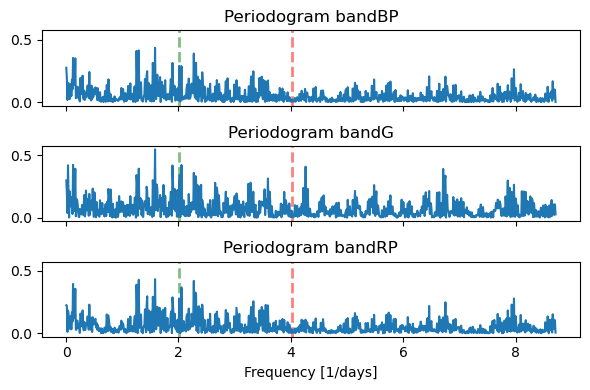

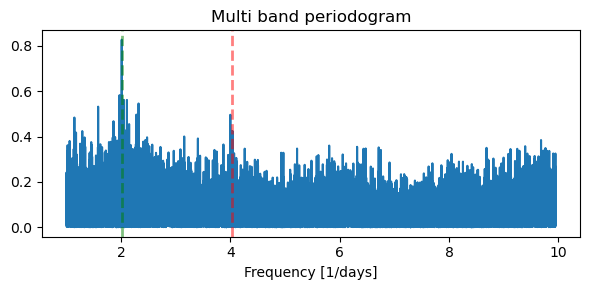

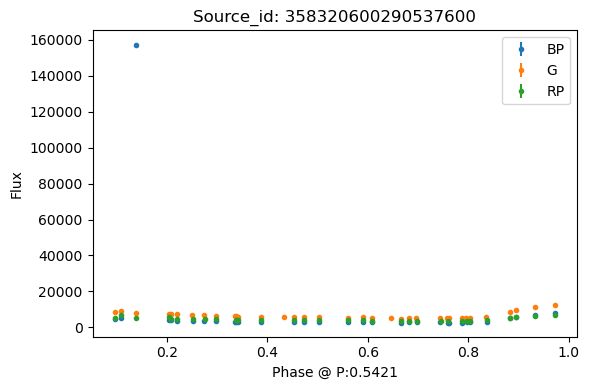

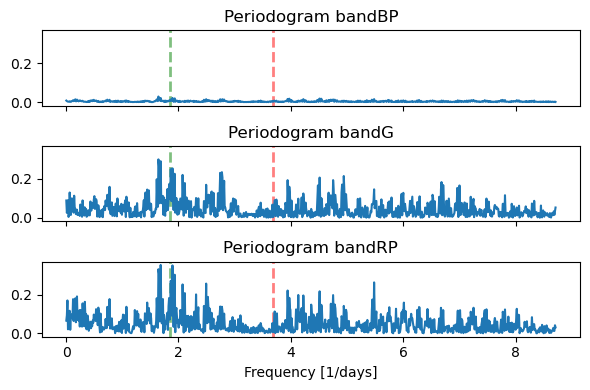

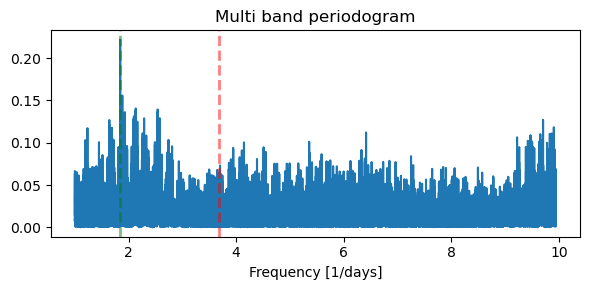

In [15]:
directory = '../dataset'

for folder_type in os.listdir(directory):
    #../dataset/ECL
    d_folder_type = os.path.join(directory, folder_type)
    if folder_type == "ECL":
        freq = np.arange(0.001473, 2*4.999929 , 1e-4)
    else:
        freq = np.arange(1.00061, 2*4.973236 , 1e-4)
    if folder_type.find('.') == -1:
        for folder_lc in os.listdir(d_folder_type):
            # 4349198890274016128
            d_folder_lc = os.path.join(d_folder_type, folder_lc)
            lc = pd.read_pickle(os.path.join(d_folder_lc, folder_lc+'.pkl'))
            name_lc = lc.source_id.iloc[0]
            period = data_global[data_global.index == name_lc].values[0][0]
            folded_lc_image(lc, period, d_folder_lc)
            periodograms_band(lc, period,d_folder_lc, freq)
            periodogram_multiband(lc,period, d_folder_lc, freq)


In [10]:
lc.source_id.iloc[0]

5320513612646544256

In [15]:
lc_problem

['../dataset/RR/5947466339779704704',
 '../dataset/RR/5902502090966850944',
 '../dataset/RR/5712267402298562560',
 '../dataset/RR/414454384036382208',
 '../dataset/RR/414152842984521856',
 '../dataset/RR/4312275915434370944',
 '../dataset/RR/414254032403091072',
 '../dataset/RR/5817459814331374464',
 '../dataset/RR/5902492951263616256',
 '../dataset/RR/5712051936679272576',
 '../dataset/RR/246570709506590848',
 '../dataset/RR/5902437838253572992',
 '../dataset/RR/415480056586586368',
 '../dataset/RR/5712009154504373248',
 '../dataset/RR/4318068039648411648',
 '../dataset/RR/5902551672065087232',
 '../dataset/RR/5902329227124762112',
 '../dataset/RR/245504251951140864',
 '../dataset/RR/415000566440590976',
 '../dataset/RR/5712200744407001728',
 '../dataset/RR/5902342146371726592',
 '../dataset/RR/245823861938360064',
 '../dataset/RR/5712340592847082240',
 '../dataset/RR/5902404092663882112',
 '../dataset/RR/415808810565481856',
 '../dataset/RR/358693648267575424',
 '../dataset/RR/431215

4.459657470466804


ValueError: zero-size array to reduction operation minimum which has no identity

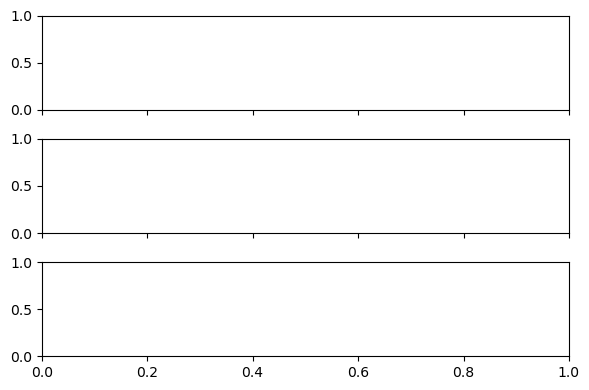

In [21]:
# curva en la que da error 
d_folder_lc = '../dataset/RR/2054001558797686400'
folder_lc = '2054001558797686400'
lc = pd.read_pickle(os.path.join(d_folder_lc, folder_lc+'.pkl'))
name_lc = lc['source_id'].loc[0]
period = data_global[data_global.index == name_lc].values[0][0]
freq = np.arange(1.119494, 2*2.887145 , 0.005)
periodograms_band(lc, period,d_folder_lc, freq)

In [32]:
if np.isnan(lc.groupby('band').get_group('G').time).unique:
    print("sii")

sii


In [31]:
lc.groupby('band').get_group('G')

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
0,2054001558797686400,20354255807365463,G,1764.940607,20.575239,110.879503,3.840775,28.869041,false,false,4194305,375316653866487564
1,2054001558797686400,22012388733133232,G,1794.925197,20.600237,108.355788,3.009688,36.002327,false,false,1,375316653866487564
2,2054001558797686400,23445883686381005,G,1820.847639,20.107547,170.579979,27.382102,6.229616,false,false,8356861,375316653866487564
3,2054001558797686400,23449975958066139,G,1820.921642,20.798045,90.308512,24.205576,3.730897,false,false,8356861,375316653866487564
4,2054001558797686400,26241693846377285,G,1871.407598,19.892983,207.851665,23.431581,8.870578,false,true,8356863,375316653866487564
5,2054001558797686400,26255527066785065,G,1871.657768,19.746384,237.899298,25.836279,9.207955,false,true,8356863,375316653866487564
6,2054001558797686400,26265267809837786,G,1871.833926,20.019175,185.044755,33.822824,5.471003,false,false,8356861,375316653866487564
7,2054001558797686400,27274820776916087,G,1890.091803,20.640642,104.397433,7.404499,14.099190,false,false,262177,375316653866487564
8,2054001558797686400,27278913015837763,G,1890.165811,20.520022,116.664311,9.496269,12.285279,false,false,1,375316653866487564
9,2054001558797686400,27288653794129792,G,1890.341974,20.572475,111.162126,3.328307,33.399002,false,false,1,375316653866487564


In [17]:
directory = '../dataset'
lc_problem = []

for folder_type in os.listdir(directory):
    #../dataset/ECL
    if folder_type == "RR":
        d_folder_type = os.path.join(directory, folder_type)
        freq = np.arange(1.119494, 2*2.887145 , 0.005)
        if folder_type.find('.') == -1:
            for folder_lc in os.listdir(d_folder_type):
                # 4349198890274016128
                d_folder_lc = os.path.join(d_folder_type, folder_lc)
                lc = pd.read_pickle(os.path.join(d_folder_lc, folder_lc+'.pkl'))
                name_lc = lc['source_id'].loc[0]
                period = data_global[data_global.index == name_lc].values[0][0]
                #folded_lc_image(lc, period, d_folder_lc)
                if lc.flux.isna().any():
                    x=2
                    #lc_problem.append(d_folder_lc)
                else:
                    if d_folder_lc in lc_problem:
                        periodograms_band(lc, period,d_folder_lc, freq)
                #periodogram_multiband(lc,period, d_folder_lc, freq)